<a href="https://colab.research.google.com/github/dfangnon/Personal_Projects/blob/main/Network_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT : Network Science analysis 2022-2023

#### Outline of the Workshop

1. What is a graph?
2. Types of Graph: Directed and Undirected
3. Notion of degree: in-degree, out-degree
4. What is the edge density?
5. Notion of eccentricity?
6. Clustering coefficient
7. Betweenness centrality
8. Closeness centrality
9. Community detection
10. Degree centrality

### a) Visualize the social network and tells us at glance what you can see

In [ ]:
pip install networkx
pip install seaborn

In [ ]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('Data_AMMI.csv', sep = ';', header = 0)
data

,Name,Country,Age,Field,Background,Friend 1,Friend 2,Friend 3,Friend 4,Friend 5
0,Verlon,Congo Brazzaville,oWsCB/+gS+vc+GqdYheJlQ===\,AMMI,Mathematics,Dieu-Donne,Uriel,Lionel,Phanie,Jaleel
1,Phanie,Cameroon,q6NxF/tTREvZ/1JqaZLeIg===\,AMMI,Physics,Sorel,Dieu-Donne,Honorine,Uriel,Verlon
2,Dieu-Donne,Benin,Ml2EoEE5hloNEcx1e61gHQ===\,AMMI,Mathematics,Verlon,Uriel,Lionel,Phanie,Jaleel
3,Mame Diarra Diop,Senegal,Yo0A5wlJWVmOLVSoY/y57w===\,AMMI,Biology,Sorel,Uriel,Ngone,Mame Diarra Diouf,Amisi
4,Honorine,Benin,q6NxF/tTREvZ/1JqaZLeIg===\,AMMI,Physics,Binta,Khady,Ngone,Phanie,Samueal
5,Binta,Senegal,oWsCB/+gS+vc+GqdYheJlQ===\,AMMI,Computer Science,Khady,Damaris,Sorel,Honorine,Solafa
6,Armandine,Cameroon,Yo0A5wlJWVmOLVSoY/y57w===\,AMMI,Computer Science,Phanie,Mame Diarra Diop,Binta,Damaris,Lionel
7,Omer,Sudan,fbUazztbrV2LAZo4N5I60Q===\,AMMI,Statistics,El Mamoune,Binta,Armandine,Fay,Bahati
8,Khady,Senegal,oWsCB/+gS+vc+GqdYheJlQ===\,AMMI,Computer Science,Ngone,Binta,Honorine,El Mamoune,Phanie
9,Bahati,RD Congo,Wwl6V+4SxEBCYVw4rG7Ekg===\,AMMI,Mathematics,Khady,Damaris,Amisi,Omer,Elie


<AxesSubplot:xlabel='count', ylabel='Country'>

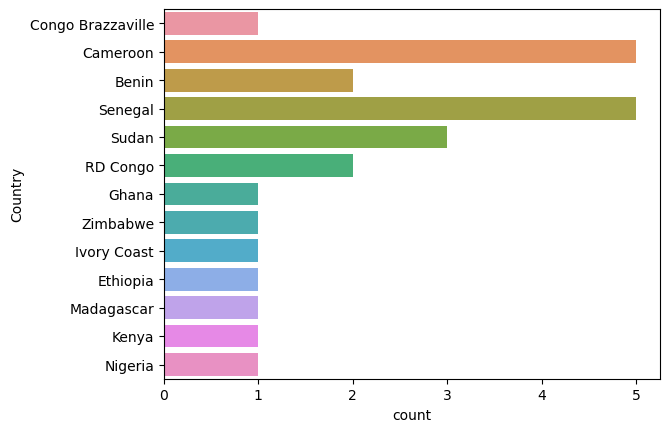

In [ ]:
sns.countplot(data = data, y = 'Country')

<AxesSubplot:xlabel='count', ylabel='Background'>

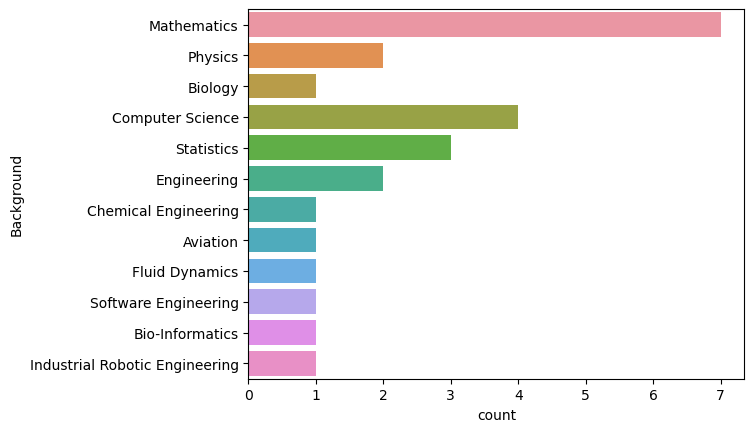

In [ ]:
sns.countplot(data = data, y = 'Background')

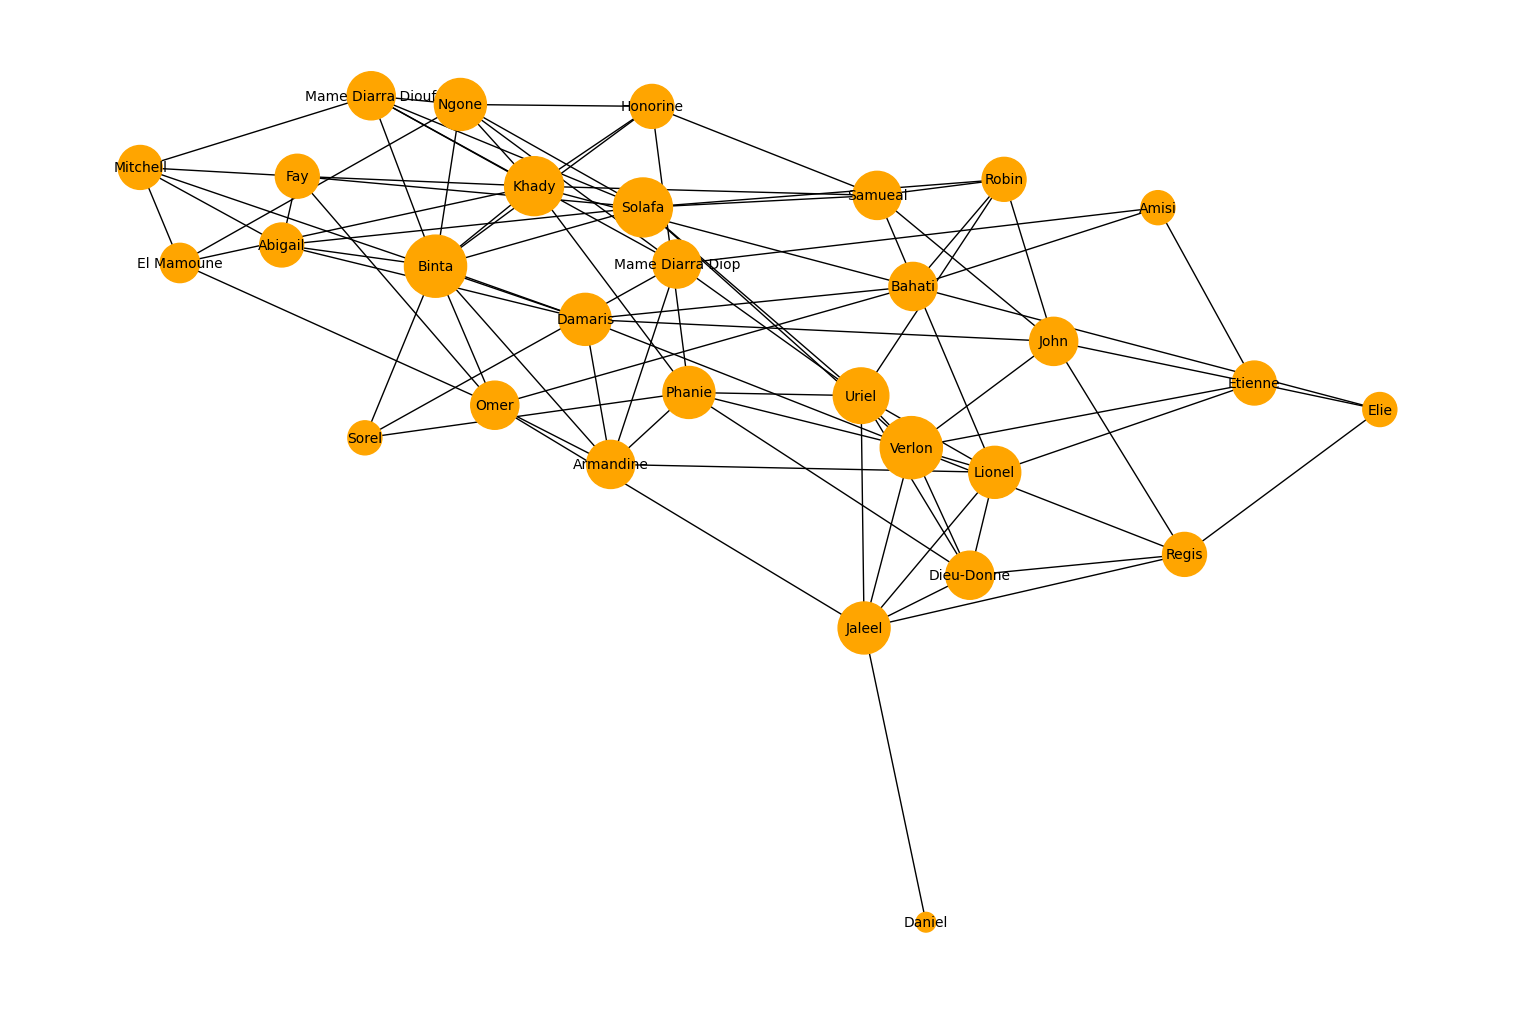

In [ ]:

ammiNetwork = nx.Graph()

for i in range(len(data["Name"])) :
    ammiNetwork.add_node(data["Name"][i], Age=data["Age"][i],country=data["Country"][i], Field=data["Field"][i], background=data["Background"][i])
    

for j in range(len(data["Name"])) :
    ammiNetwork.add_edge(data["Name"][j],data["Friend 1"][j])
    ammiNetwork.add_edge(data["Name"][j],data["Friend 2"][j])
    ammiNetwork.add_edge(data["Name"][j],data["Friend 3"][j])
    ammiNetwork.add_edge(data["Name"][j],data["Friend 4"][j])
    ammiNetwork.add_edge(data["Name"][j],data["Friend 5"][j])

Degree=ammiNetwork.degree()

deg=[]
deg1=[]
for (i,j) in Degree:
    deg.append(j)
    deg1.append(i)
var=[200*k for k in deg]

plt.figure(figsize=(15,10))
nx.draw_spring(ammiNetwork, font_size=10, node_size = var, with_labels=True, node_color="orange")
plt.savefig('ammiNetworkspring.png')
plt.show()


### b) Give the structure of that network and do some quick network statistics

In [ ]:
## Number of Nodes in our network 

ammiNetwork.number_of_nodes()

30

In [ ]:
## List of Nodes in our network 

ammiNetwork.nodes()

NodeView(('Verlon', 'Phanie', 'Dieu-Donne', 'Mame Diarra Diop', 'Honorine', 'Binta', 'Armandine', 'Omer', 'Khady', 'Bahati', 'Fay', 'Mame Diarra Diouf', 'Solafa', 'Ngone', 'Damaris', 'Abigail', 'Mitchell', 'Regis', 'Samueal', 'Robin', 'John', 'Etienne', 'Lionel', 'Jaleel', 'Uriel', 'Sorel', 'Amisi', 'El Mamoune', 'Elie', 'Daniel'))

In [ ]:
## Number of Edges in our network 

ammiNetwork.number_of_edges()

89

In [ ]:
## List of Edges in our network 

ammiNetwork.edges()

EdgeView([('Verlon', 'Dieu-Donne'), ('Verlon', 'Uriel'), ('Verlon', 'Lionel'), ('Verlon', 'Phanie'), ('Verlon', 'Jaleel'), ('Verlon', 'Solafa'), ('Verlon', 'Damaris'), ('Verlon', 'Regis'), ('Verlon', 'John'), ('Verlon', 'Etienne'), ('Phanie', 'Sorel'), ('Phanie', 'Dieu-Donne'), ('Phanie', 'Honorine'), ('Phanie', 'Uriel'), ('Phanie', 'Armandine'), ('Phanie', 'Khady'), ('Dieu-Donne', 'Uriel'), ('Dieu-Donne', 'Lionel'), ('Dieu-Donne', 'Jaleel'), ('Dieu-Donne', 'Regis'), ('Mame Diarra Diop', 'Sorel'), ('Mame Diarra Diop', 'Uriel'), ('Mame Diarra Diop', 'Ngone'), ('Mame Diarra Diop', 'Mame Diarra Diouf'), ('Mame Diarra Diop', 'Amisi'), ('Mame Diarra Diop', 'Armandine'), ('Honorine', 'Binta'), ('Honorine', 'Khady'), ('Honorine', 'Ngone'), ('Honorine', 'Samueal'), ('Binta', 'Khady'), ('Binta', 'Damaris'), ('Binta', 'Sorel'), ('Binta', 'Solafa'), ('Binta', 'Armandine'), ('Binta', 'Omer'), ('Binta', 'Mame Diarra Diouf'), ('Binta', 'Ngone'), ('Binta', 'Abigail'), ('Armandine', 'Damaris'), ('Arma

In [ ]:
## List of Nodes and Their Degree

ammiNetwork.degree()

#### What is the Network Density, Degree Distribution, Eccentricity, Clustering Coefficient, average shortest path distance Clustering, Betweenness centrality, Closeness centrality, Degree centrality?

$$ Edge Density = \dfrac{2 \times |V|}{N(N - 1)}$$

1. $|V|$ is the number of edges
2. $N$ is the number of nodes in the network

In [ ]:
# “Network density” describes the portion of the potential connections in a network that are actual connections.

len_edges=len(ammiNetwork.edges())
len_nodes= len(ammiNetwork.nodes())
Edge_Density=(2*len_edges)/(len_nodes*(len_nodes-1))
print('The network density is:', Edge_Density)

The network density is: 0.2045977011494253


The Network density is 0.20 so we can say the this network is not dense

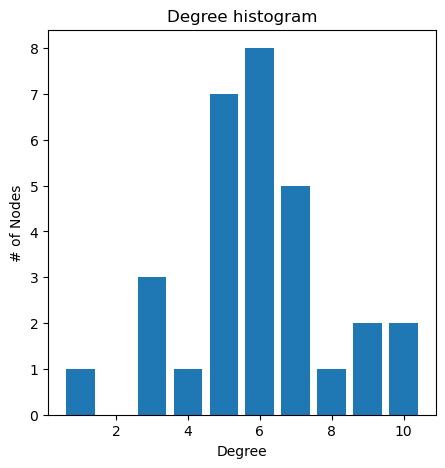

In [ ]:
degree_sequence = sorted([d for n, d in ammiNetwork.degree()], reverse=True)
dmax = max(degree_sequence)

plt.figure(figsize=(5, 5))
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

There is only 2 students that has a higher degree which is 10 

#### Eccentricity

The Eccentricity of a node v is the maximum distance from v to all other nodes in aimsNetwork.

In [ ]:

print("Eccentricity: ", nx.eccentricity(ammiNetwork))

Eccentricity:  {'Verlon': 3, 'Phanie': 3, 'Dieu-Donne': 3, 'Mame Diarra Diop': 3, 'Honorine': 4, 'Binta': 3, 'Armandine': 3, 'Omer': 3, 'Khady': 4, 'Bahati': 3, 'Fay': 3, 'Mame Diarra Diouf': 4, 'Solafa': 3, 'Ngone': 4, 'Damaris': 3, 'Abigail': 4, 'Mitchell': 4, 'Regis': 3, 'Samueal': 3, 'Robin': 3, 'John': 3, 'Etienne': 4, 'Lionel': 3, 'Jaleel': 3, 'Uriel': 3, 'Sorel': 4, 'Amisi': 4, 'El Mamoune': 4, 'Elie': 4, 'Daniel': 4}


#### Clustering coefficient

$$ Clustering Coefficient(i) = \dfrac{2 \times N_i}{d(i)(d(i) - 1)}$$

1. $N_i$ is the number of links between neighbors of i
2. $d(i)$ is the degree of i

In [ ]:
#In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.
clust_coeff=nx.clustering(ammiNetwork)
clust_coeff

{'Verlon': 0.3333333333333333,
 'Phanie': 0.19047619047619047,
 'Dieu-Donne': 0.6666666666666666,
 'Mame Diarra Diop': 0.06666666666666667,
 'Honorine': 0.5,
 'Binta': 0.24444444444444444,
 'Armandine': 0.13333333333333333,
 'Omer': 0.06666666666666667,
 'Khady': 0.2222222222222222,
 'Bahati': 0,
 'Fay': 0.2,
 'Mame Diarra Diouf': 0.4,
 'Solafa': 0.2222222222222222,
 'Ngone': 0.42857142857142855,
 'Damaris': 0.19047619047619047,
 'Abigail': 0.5,
 'Mitchell': 0.2,
 'Regis': 0.4,
 'Samueal': 0.2,
 'Robin': 0.3,
 'John': 0.26666666666666666,
 'Etienne': 0.2,
 'Lionel': 0.3333333333333333,
 'Jaleel': 0.38095238095238093,
 'Uriel': 0.35714285714285715,
 'Sorel': 0,
 'Amisi': 0,
 'El Mamoune': 0.16666666666666666,
 'Elie': 0,
 'Daniel': 0}

In [ ]:

average_clust= sum (clust_coeff.values())/len(clust_coeff)
average_clust

In [ ]:
#Average path length is a concept in network topology that is defined as the average number of steps along the shortest paths
#for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network.
#Most real networks have a very short average path length leading to the concept of a small world where everyone 
#is connected to everyone else through a very short path.
# A short average path length facilitates the quick transfer of information and reduces costs.
nx.average_shortest_path_length(ammiNetwork)


2.098850574712644

#### Betweeness centrality

A node is important if it lies on many short path. It is playing an important role on passing/spreading information through the network.

$$ Bc(i) = \sum_{j < k} \dfrac{Ljk(i)}{Ljk} $$
1.  $Ljk$ is the total number of paths between j and k through i, and
2.  $Ljk(i)$ is the number of shortest paths that pass through i.

In [ ]:

bet_centrality=nx.betweenness_centrality(ammiNetwork)
bet_centrality

{'Verlon': 0.1080440222065838,
 'Phanie': 0.05958147626866838,
 'Dieu-Donne': 0.01347447024786926,
 'Mame Diarra Diop': 0.04686742513097193,
 'Honorine': 0.007984400656814451,
 'Binta': 0.07409590272890765,
 'Armandine': 0.030635702556884824,
 'Omer': 0.06987841113456877,
 'Khady': 0.07999843615607163,
 'Bahati': 0.07701931347251544,
 'Fay': 0.014175267808272732,
 'Mame Diarra Diouf': 0.018647861443427945,
 'Solafa': 0.09179372898584719,
 'Ngone': 0.024450699820157948,
 'Damaris': 0.07647294550003911,
 'Abigail': 0.007474196575181799,
 'Mitchell': 0.014318945969192275,
 'Regis': 0.01877394636015326,
 'Samueal': 0.03382789897568222,
 'Robin': 0.016912972085385874,
 'John': 0.029357260145437478,
 'Etienne': 0.029542966611932127,
 'Lionel': 0.037740441003987796,
 'Jaleel': 0.09560364375635311,
 'Uriel': 0.06264465556337476,
 'Sorel': 0.003718038939713817,
 'Amisi': 0.015757682383298145,
 'El Mamoune': 0.010080928923293455,
 'Elie': 0.00846626006724529,
 'Daniel': 0.0}

#### Closeness centrality

$$ Cc(i) = \dfrac{n - 1}{\sum_{j = 1}^{n} d(i, j) }$$
1.  $n$ is the number of nodes in the graph and
2.  $d(i, j)$ is the shortest distance between i and all the other nodes j.

In [ ]:
clo_centrality=nx.closeness_centrality(ammiNetwork)
clo_centrality

{'Verlon': 0.5918367346938775,
 'Phanie': 0.5178571428571429,
 'Dieu-Donne': 0.47540983606557374,
 'Mame Diarra Diop': 0.4915254237288136,
 'Honorine': 0.47540983606557374,
 'Binta': 0.5370370370370371,
 'Armandine': 0.5178571428571429,
 'Omer': 0.5272727272727272,
 'Khady': 0.5370370370370371,
 'Bahati': 0.5178571428571429,
 'Fay': 0.4603174603174603,
 'Mame Diarra Diouf': 0.47540983606557374,
 'Solafa': 0.5576923076923077,
 'Ngone': 0.48333333333333334,
 'Damaris': 0.5576923076923077,
 'Abigail': 0.453125,
 'Mitchell': 0.4264705882352941,
 'Regis': 0.4393939393939394,
 'Samueal': 0.4915254237288136,
 'Robin': 0.5,
 'John': 0.48333333333333334,
 'Etienne': 0.4393939393939394,
 'Lionel': 0.4915254237288136,
 'Jaleel': 0.4915254237288136,
 'Uriel': 0.5471698113207547,
 'Sorel': 0.4142857142857143,
 'Amisi': 0.42028985507246375,
 'El Mamoune': 0.43283582089552236,
 'Elie': 0.4027777777777778,
 'Daniel': 0.3333333333333333}

In [ ]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


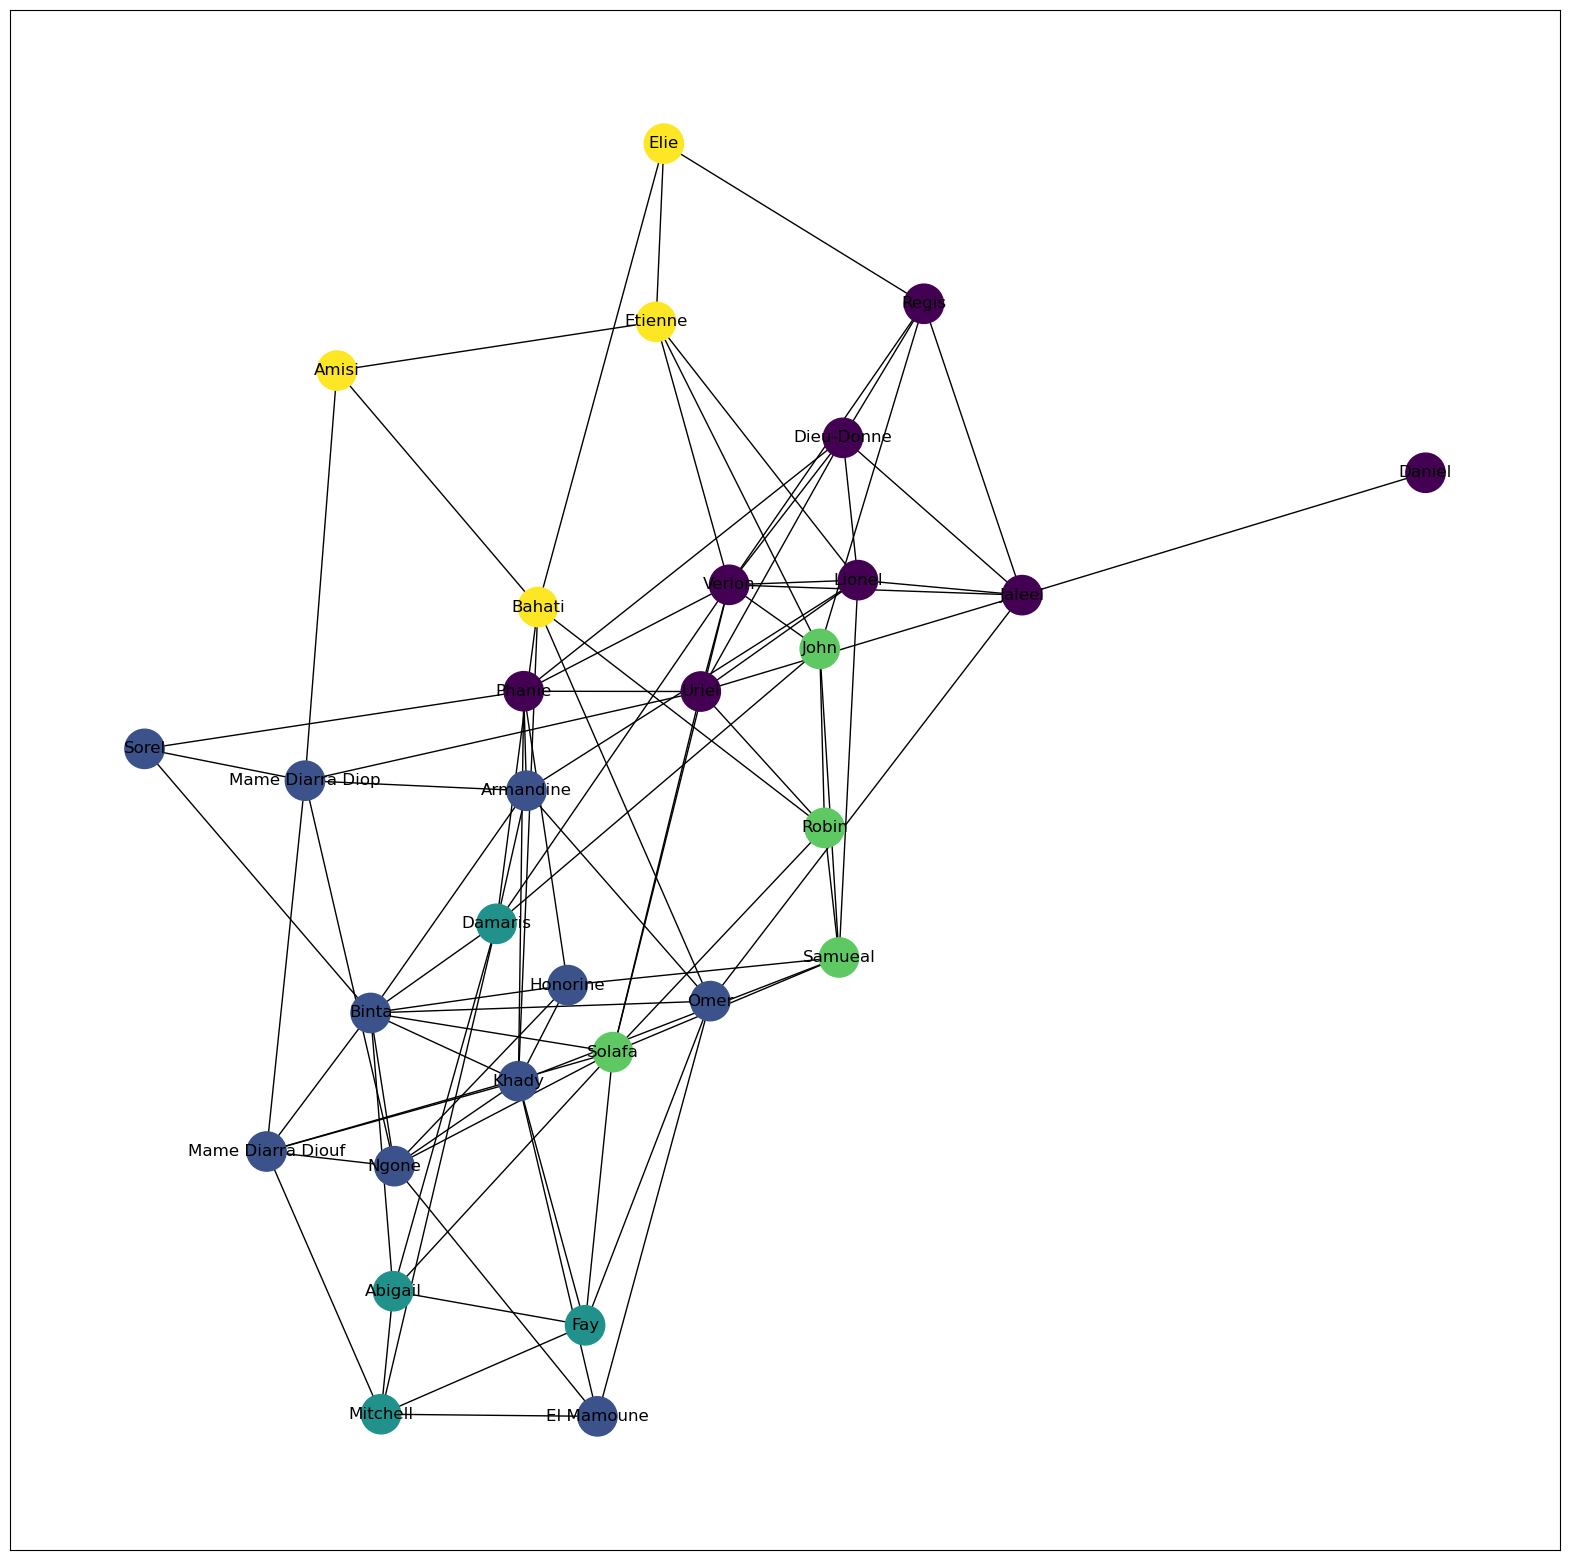

In [ ]:
import community as community_louvain
import matplotlib.cm as cm

# compute the best partition
partition = community_louvain.best_partition(ammiNetwork)

plt.figure(figsize=(20,20))
# draw the graph
pos = nx.spring_layout(ammiNetwork)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(ammiNetwork, pos, partition.keys(), node_size=800,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(ammiNetwork, pos)
nx.draw_networkx_labels(ammiNetwork,pos)
plt.savefig('ammiNetworkcommunity.png')
plt.show()

In [ ]:
## List of Communities 

for i in set(partition.values()):
    print ("community",i)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes]==i]
    print (members)

community 0
['Verlon', 'Phanie', 'Dieu-Donne', 'Regis', 'Lionel', 'Jaleel', 'Uriel', 'Daniel']
community 1
['Mame Diarra Diop', 'Honorine', 'Binta', 'Armandine', 'Omer', 'Khady', 'Mame Diarra Diouf', 'Ngone', 'Sorel', 'El Mamoune']
community 2
['Fay', 'Damaris', 'Abigail', 'Mitchell']
community 3
['Solafa', 'Samueal', 'Robin', 'John']
community 4
['Bahati', 'Etienne', 'Amisi', 'Elie']


### Question 1) Can you tells us what this social network was able to discover among student interactions?

###  Question 2) What do you think can be done to improve the predictability power of the construction social network?

### g) Then carry out of centrality measure and community detection for this social network.

#### The degree centrality for a node v is the fraction of nodes it is connected to. The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

$$Dc(i) = \dfrac{d(i)}{n - 1}$$
1. $d(i)$ is the degree of node i
2. $n$ is the number of nodes of the graph

In [ ]:

centrality_degree=nx.degree_centrality(ammiNetwork)
centrality_degree

{'Verlon': 0.3448275862068966,
 'Phanie': 0.24137931034482757,
 'Dieu-Donne': 0.20689655172413793,
 'Mame Diarra Diop': 0.20689655172413793,
 'Honorine': 0.1724137931034483,
 'Binta': 0.3448275862068966,
 'Armandine': 0.20689655172413793,
 'Omer': 0.20689655172413793,
 'Khady': 0.3103448275862069,
 'Bahati': 0.20689655172413793,
 'Fay': 0.1724137931034483,
 'Mame Diarra Diouf': 0.20689655172413793,
 'Solafa': 0.3103448275862069,
 'Ngone': 0.24137931034482757,
 'Damaris': 0.24137931034482757,
 'Abigail': 0.1724137931034483,
 'Mitchell': 0.1724137931034483,
 'Regis': 0.1724137931034483,
 'Samueal': 0.20689655172413793,
 'Robin': 0.1724137931034483,
 'John': 0.20689655172413793,
 'Etienne': 0.1724137931034483,
 'Lionel': 0.24137931034482757,
 'Jaleel': 0.24137931034482757,
 'Uriel': 0.27586206896551724,
 'Sorel': 0.10344827586206896,
 'Amisi': 0.10344827586206896,
 'El Mamoune': 0.13793103448275862,
 'Elie': 0.10344827586206896,
 'Daniel': 0.034482758620689655}